In [2]:
import numpy as np

x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')

In [3]:
# creating bins code
Ntrain = x_train.shape[0]

# Ntrain = 10
bin_max = 50
bin_min = -50
bin_size = 2
bin_num = int((bin_max-bin_min)/bin_size)

x_train_bin_s = np.zeros((Ntrain,bin_num))

index = 0
ex = 0

# training data processing
for k in range(Ntrain):
    if np.mod(k+1,100) == 0:
        print('Training Generation: ',k+1,'/',Ntrain)
    for i in range(x_train.shape[1]-1):
        if x_train[k,i]!=x_train[k,i+1]:
            for j in range(bin_num):
                if x_train[k,i] >= (bin_size*j+bin_min) and x_train[k,i] <= (bin_size*(j+1)+bin_min):
                    x_train_bin_s[k,j] += 1


Training Generation:  100 / 100


[2.5279622 0.       ]


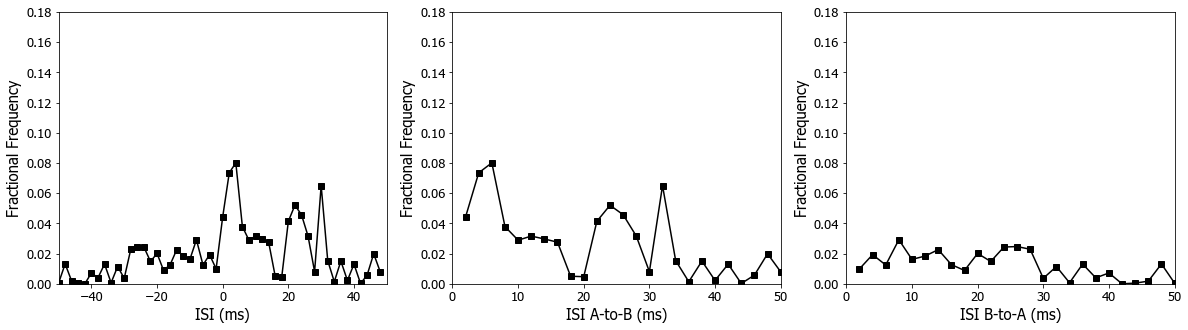

In [11]:
import matplotlib.pyplot as plt

x_train_bin_norm = np.divide(x_train_bin_s,np.sum(x_train_bin_s,axis=1,keepdims=True)*np.ones(x_train_bin_s.shape))
x_train_bin_norm_r = x_train_bin_norm[:,25:]
x_train_bin_norm_l = np.fliplr(x_train_bin_norm[:,:-25])

tbin = np.arange(bin_min,bin_max,bin_size)

ex = 17
print(y_train[ex])

font = {'family' : 'Tahoma',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)


# plt.rc('font', family='Verdana')
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
plt.rc('text', usetex=False)


plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.plot(tbin,x_train_bin_norm[ex],'ks-')
plt.xlabel('ISI (ms)')
plt.ylabel('Fractional Frequency')
plt.xlim([-50,50])
plt.ylim([0,0.18])

plt.subplot(1,3,2)
plt.plot(tbin[25:]+2,x_train_bin_norm_r[ex],'ks-')
plt.xlabel('ISI A-to-B (ms)')
plt.ylabel('Fractional Frequency')
plt.xlim([0,50])
plt.ylim([0,0.18])

plt.subplot(1,3,3)
plt.plot(tbin[25:]+2,x_train_bin_norm_l[ex],'ks-')
plt.xlabel('ISI B-to-A (ms)')
plt.ylabel('Fractional Frequency')
plt.xlim([0,50])
plt.ylim([0,0.18])

plt.savefig("x_data.svg")
plt.show()

In [20]:
# divide in half
X = x_train_bin_s
Y = y_train

Xn = np.zeros((int(2*X.shape[0]),int(X.shape[1]/2)))
Yn = np.zeros((int(2*X.shape[0]),int(Y.shape[1]/2)))
Xn[:X.shape[0],:] = X[:,25:]
Yn[:X.shape[0],:] = (Y[:,:1]>1)*1
Xn[X.shape[0]:,:] = np.fliplr(X[:,:25])
Yn[X.shape[0]:,:] = (Y[:,1:]>1)*1

Xones = np.ones((Xn.shape[0],Xn.shape[1]+1))
Xones[:,1:] = Xn
print(Xones.shape)
print(Xones[1])

(200, 26)
[1.000e+00 1.470e+02 9.410e+02 4.020e+02 1.125e+03 8.170e+02 8.460e+02
 5.680e+02 1.008e+03 1.170e+03 8.520e+02 4.750e+02 1.143e+03 2.363e+03
 2.166e+03 3.373e+03 1.409e+03 1.400e+01 3.030e+02 3.030e+02 6.810e+02
 6.200e+01 7.050e+02 0.000e+00 4.080e+02 6.240e+02]


In [21]:
# l2 regularization
B = np.zeros((Xones.shape[1],1))
P = np.zeros((Xones.shape[0],1))
P = np.divide(1,1+np.exp(-np.dot(Xones,B)))
V = np.zeros((Xones.shape[0],Xones.shape[0]))
np.fill_diagonal(V, P)

d = 0.0001

for i in range(10000):
    P = np.divide(1,1+np.exp(-np.dot(Xones,B)))
    np.fill_diagonal(V, P)
    B = B + np.dot(np.linalg.inv(np.dot(np.dot(Xones.T,V),Xones))-np.multiply(d,np.eye(Xones.shape[1])),np.dot(Xones.T,Yn-P) - np.multiply(d,B))

print(B)

c:\users\joe\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


[[-12853.99794144]
 [ 43263.9913075 ]
 [ 84837.67810973]
 [118124.24752632]
 [148416.02874144]
 [ 99683.97974552]
 [102727.05508848]
 [104533.0173716 ]
 [115346.41102471]
 [ 91843.03836167]
 [100467.80658248]
 [107422.8944757 ]
 [108188.79387565]
 [107774.9798815 ]
 [121214.09281716]
 [106140.83557993]
 [104910.0806799 ]
 [ 48420.04204301]
 [ 47170.95961153]
 [ 42698.97196962]
 [ 35261.0051672 ]
 [ 36363.53437153]
 [ 34771.15637119]
 [ 26490.27552377]
 [ 32752.91094779]
 [ 22849.3672532 ]]
